<a href="https://colab.research.google.com/github/gabriel-am12/data_sc_projects/blob/main/Analyzing_Airbnb_Data_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - *Dublin*

The [Airbnb](https://www.airbnb.com.br/) is already considered to be the **largest hotel company today**. Oh, the detail is that it does **not own any hotel**!

Connecting peoples who want to travel (and stay) with hosts who want to rent their properties in a pratical way, the Airbnb provides an innovative platform to make this accommodation alternative.

By the end of 2018, the Startup, founded 10 years ago, had already **hosted over 300 million** of people around the world, challenging traditional hotel chains.

One of Airbnb's initiatives is to make data from the site available to some of the world's major cities. Through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website, it is possible to download a large amount of data to develop *Data Science* projects and solutions.

<center><img alt="Analyzing Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we will analyze the data regarding the city Dublin, located in the province of Leinster,Ireland, and see which insights can be extracted from raw data.**
<br>
<p align="center"><img src="https://raw.githubusercontent.com/gabriel-am12/images/main/dublin.jpg" height="500px"></p>

<br>

Dublin is a strong European tourist spot. The city manages to be a synthesis of what the Irish culture is. **Pubs, castles, museums and historical monuments** are some points of interest that can be mentioned.




## Obtaining the data
All data used in this project can be found on [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website

Only the following file will be used to perform the exploratory analysis:
* `listings.csv` - *Summary information and metrics for listings in Dublin (good for visualisations).*





In [1]:
# import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import the listings.csv file into a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/ireland/leinster/dublin/2020-12-17/visualisations/listings.csv")

## Data Analysis
The beginning of the content analysis:

**Variables Dictionary**

* `id` - id number generated to identify the property
* `name` - name of the property announced
* `host_id` - id number of the owner (host) of the property
* `host_name` - Host's name
* `neighbourhood_group` - this column contains no value
* `neighbourhood` - name of the neighbourhood
* `latitude` - latitude coordinate of the property
* `longitude` - property longitude coordinate
* `room_type` - informs the type of room that is offered
* `price` - price to rent the property
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - number of reviews the property has
* `last_review` - date of last review
* `reviews_per_month` - amount of reviews per month
* `calculated_host_listings_count` - number of properties of the same host
* `availability_365` - number of days of availability within 365 days

we will check the beginning of our *dataset*, analyzing the first 5 entries.

In [3]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,1.91,3,0
1,68483,Unique Central Dublin River-view,339817,John,NaN,Dublin City,53.34501,-6.26552,Entire home/apt,92,3,103,2019-08-12,0.87,1,43
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.05,1,348
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,51,3,182,2020-03-09,1.56,3,114
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.95,3,0


### **Q1. How many attributes (variables) and how many entries does our data set have? What are the types of variables?**

In [ ]:
# identify the DataFrame data volume
print("Entries:\t {}".format(df.shape[0]))
print("Variables:\t {}".format(df.shape[1]))
# check the first 5 entries of dataset
display(df.dtypes)


Entries:	 7894
Variables:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

The dataset has 7.894 properties and 16 variables of the integer, object and float types.

### **Q2. What is the percentage of missing values in the *dataset*?**

* The column `neighbourhood_group` has 100% of its missing values
* The variables `reviews_per_month` and `last_review` have by approximately 20%
*`name` has approximately 0.1% of null values

In [ ]:
# sort the variables in descending order by their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.193311
last_review                       0.193311
name                              0.000127
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. What is the type of distribution of the variables?**

For a better view, a histogram will be plotted. 


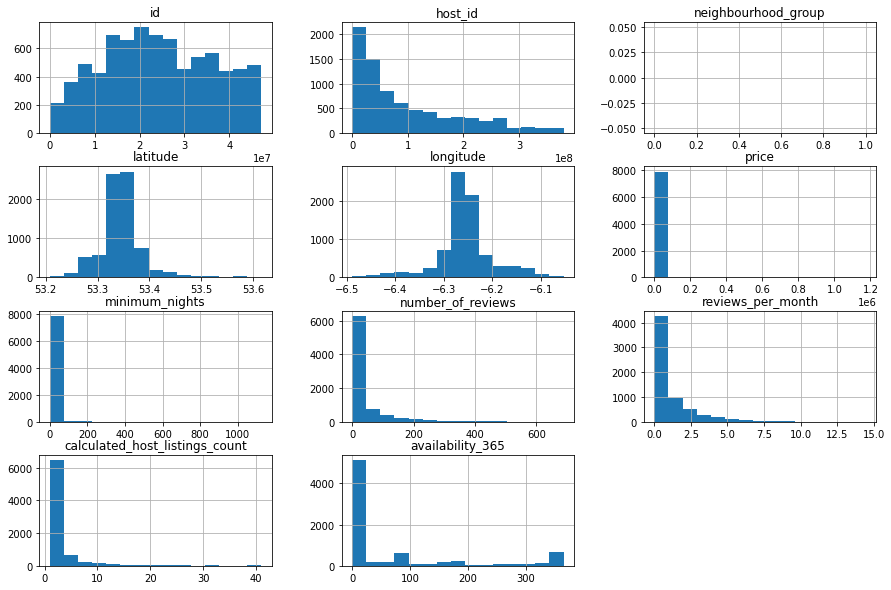

In [ ]:
# plot the histogram of the numerical variables
df.hist(bins=15, figsize=(15,10));

### **Q4. Are there *outliers* present?**

From the distribution of the histogram, you can see evidence of the presence of *outliers*. Take for example the variables `price`, `minimum_nights` and `calculated_host_listings_count`.

The values do not follow a distribution, and distort the whole graphical representation. To confirm, there are two quick ways that help detect *outliers*. They are:

* Summary statistics via the `describe()` method.
* Plot boxplots for the variable.

In [4]:
# see the summary statistics of the numerical variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.894000e+03,7894.000000,7894.000000,6368.000000,7894.000000,7894.000000
mean,2.749541e+02,4.953636,32.282366,1.034852,2.946035,70.087281
std,1.321374e+04,22.738843,60.848500,1.387199,4.897648,117.881707
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,5.000000e+01,1.000000,1.000000,0.130000,1.000000,0.000000
50%,8.000000e+01,2.000000,6.000000,0.460000,1.000000,0.000000
75%,1.320000e+02,3.000000,33.000000,1.380000,2.000000,89.000000
max,1.173721e+06,1125.000000,688.000000,14.460000,41.000000,365.000000


#### Boxplot for `minimum_nights`

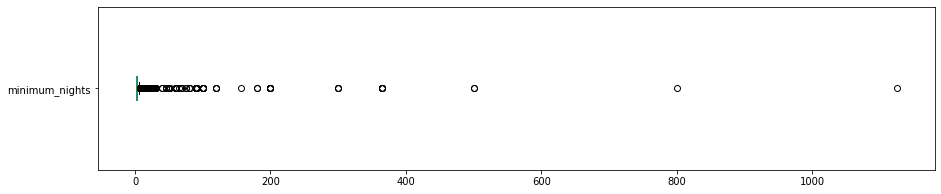

minimum_nights: values above 30:
80 entries
1.0134%


In [5]:
# minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# see amount of values over 30 days for minimum_nights
print("minimum_nights: values above 30:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot for `price`

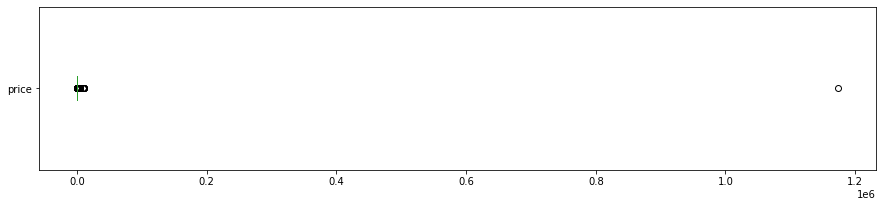


price: values above 1500
16 entries
0.2027%


In [6]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#see amount of values over 1500 for price
print("\nprice: values above 1500")
print("{} entries".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogram without *outliers*

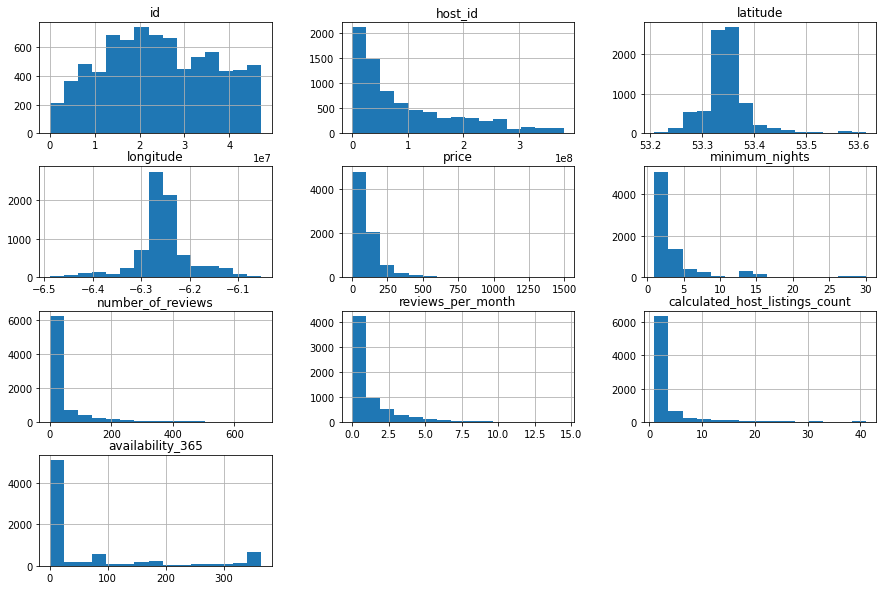

In [7]:
# remove the *outliers* in a new DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove `neighbourhood_group`, as it is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plot the histogram for the numerical variables
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. What is the correlation between the variables**
To better visualize the correlation between variables, a correlation matrix and a heatmap will be made.

In [8]:
# create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# show the correlation matrix
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018171,-0.055734,-0.059852,0.054101,0.095222
minimum_nights,0.018171,1.000000,-0.018251,-0.013017,0.137080,0.089761
number_of_reviews,-0.055734,-0.018251,1.000000,0.871682,-0.007555,0.119890
reviews_per_month,-0.059852,-0.013017,0.871682,1.000000,0.053747,0.153835
calculated_host_listings_count,0.054101,0.137080,-0.007555,0.053747,1.000000,0.185598
availability_365,0.095222,0.089761,0.119890,0.153835,0.185598,1.000000


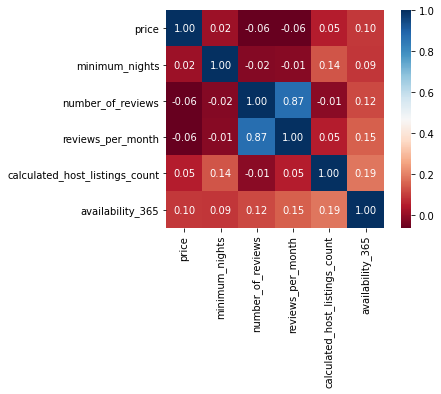

In [9]:
# plot a heatmap from the correlations
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. What is the most rented property on Airbnb?**
Let's count the number of occurrences of each rental type, using the `value_counts()` method.

In [10]:
# show the amount of each type of property available
df_clean.room_type.value_counts()

Private room       3924
Entire home/apt    3662
Shared room         138
Hotel room           75
Name: room_type, dtype: int64

In [11]:
# show the percentage of each type of property available
df_clean.room_type.value_counts() / df.shape[0]

Private room       0.497086
Entire home/apt    0.463897
Shared room        0.017482
Hotel room         0.009501
Name: room_type, dtype: float64

### **Q6. What is the most expensive location for Dublin?**



In [12]:
# see prices by neighborhood, on average
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dublin City              117.243156
Dn Laoghaire-Rathdown    112.431540
Fingal                    93.586022
South Dublin              78.495298
Name: price, dtype: float64

Above, we see that the Dublin City region has an average price higher than the other three.

The latitudes and longitudes are provided for the properties, it is possible to plot each point. For this, `x=longitude` and `y=latitude` are considered.

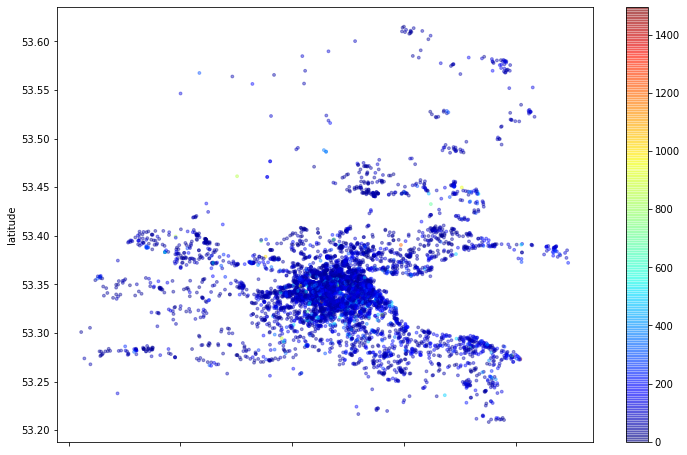

In [14]:
# plot the properties by latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [15]:
# see the average of the `minimum_nights` column
df_clean['minimum_nights'].mean()

3.5219899987177845

The average is approximately 3.5, that is, people usually stay almost 4 days in a rental property

## Conclusions
The analysis of data, even if done superficially, can be useful when renting a property, you can rent a good location without spending so much or know the average prices and nights of the rent.

This dataset is a **short version**, ideal only for an initial approach. For a better exploratory analysis, it is recommended to use the complete data set.

